In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv("IMDB Dataset.csv")



In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
# Split the dataset into train and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

In [22]:
# Convert string labels to numerical labels
train_labels = train_labels.replace({'negative': 0, 'positive': 1})
test_labels = test_labels.replace({'negative': 0, 'positive': 1})

In [23]:
# Tokenize the text
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_texts)

In [24]:
# Convert text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [25]:
# Pad sequences to have the same length
max_length = 256
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

In [26]:
# Define the model
model = Sequential([
    Embedding(num_words, 16, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model
batch_size = 128
epochs = 10
model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 4s 12ms/step - loss: 0.4918 - accuracy: 0.7249 - val_loss: 0.2782 - val_accuracy: 0.8815
Epoch 2/10
250/250 [==============================] - 2s 9ms/step - loss: 0.2102 - accuracy: 0.9193 - val_loss: 0.2798 - val_accuracy: 0.8845
Epoch 3/10
250/250 [==============================] - 2s 9ms/step - loss: 0.1055 - accuracy: 0.9669 - val_loss: 0.3261 - val_accuracy: 0.8788
Epoch 4/10
250/250 [==============================] - 2s 9ms/step - loss: 0.0414 - accuracy: 0.9905 - val_loss: 0.3935 - val_accuracy: 0.8780
Epoch 5/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0141 - accuracy: 0.9983 - val_loss: 0.4628 - val_accuracy: 0.8744
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0057 - accuracy: 0.9997 - val_loss: 0.5236 - val_accuracy: 0.8734
Epoch 7/10
250/250 [==============================] - 2s 8ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.5563 - val_accuracy: 0.8749
Epoch

In [29]:
# Evaluate the model
predictions = model.predict(test_data)
predictions = np.where(predictions > 0.5, 1, 0)
test_acc = accuracy_score(test_labels, predictions)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 1ms/step
Test accuracy: 0.8799


No Need to do the below. It conveys nothing

Epoch 1/10
250/250 [==============================] - 3s 13ms/step - loss: 3.8906e-04 - accuracy: 1.0000 - val_loss: 0.6979 - val_accuracy: 0.8760
Epoch 2/10
250/250 [==============================] - 3s 10ms/step - loss: 3.7280e-04 - accuracy: 1.0000 - val_loss: 0.7100 - val_accuracy: 0.8755
Epoch 3/10
250/250 [==============================] - 3s 12ms/step - loss: 2.6690e-04 - accuracy: 1.0000 - val_loss: 0.7309 - val_accuracy: 0.8761
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 2.2883e-04 - accuracy: 1.0000 - val_loss: 0.7481 - val_accuracy: 0.8749
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 1.8762e-04 - accuracy: 1.0000 - val_loss: 0.7651 - val_accuracy: 0.8739
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 1.6114e-04 - accuracy: 1.0000 - val_loss: 0.7796 - val_accuracy: 0.8765
Epoch 7/10
250/250 [==============================] - 3s 12ms/step - loss: 1.2253e-04 - accuracy: 1.0000 - val_loss: 0

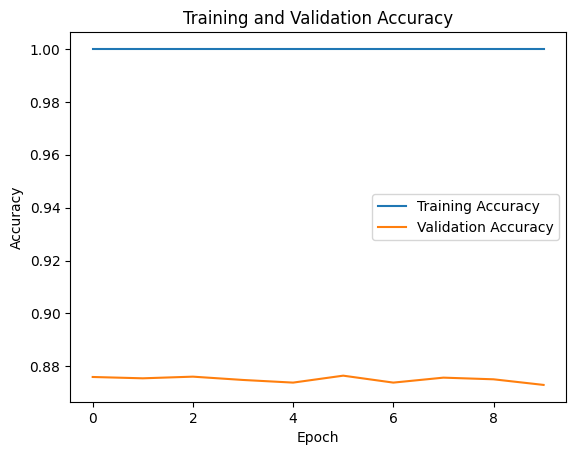

In [32]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

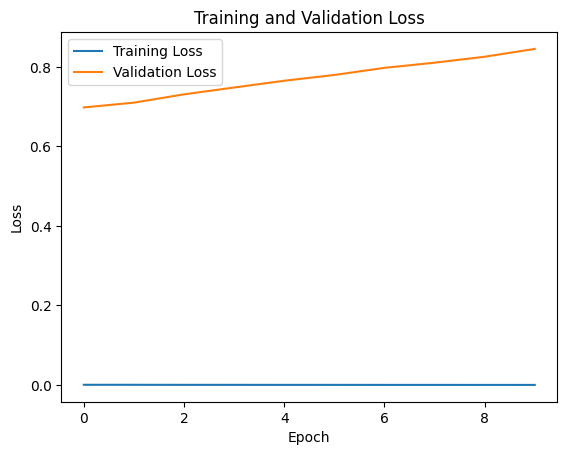

In [33]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()